In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = df.iloc[:, 2:4].values
y = df.iloc[:, -1].values

In [6]:
X.shape
y.shape

(400,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Calculating k**

In [9]:
# 1st Method
np.sqrt(X_train.shape[0])

17.88854381999832

In [10]:
k=17

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.95

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 1, 21]])

In [15]:
# 2nd Method
accuracy = []
for i in range(1, 26):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, classifier.predict(X_test)))

In [16]:
accuracy

[0.875,
 0.8875,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95]

In [17]:
np.max(accuracy)

0.95

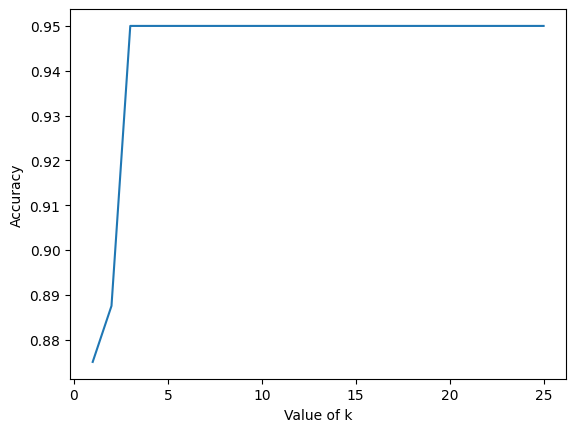

In [18]:
plt.plot(range(1, 26), accuracy)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

acc = accuracy_score(y_test, y_pred)
print(acc)

[[55  3]
 [ 1 21]]
0.95


In [23]:
def predict_output():
  age = int(input("Enter Age "))
  salary = int(input("Enter Salary "))

  X_new= np.array([[age, salary]]).reshape(1,2)
  x_new = sc.transform(X_new)
  if knn.predict(x_new)[0]==0:
    print("WILL NOT PURCHASE")
  else:
    print("WILL PURCHASE")

In [24]:
predict_output()

Enter Age20
Enter Salary30000
WILL NOT PURCHASE
